In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
def get_speed(*, mu, alpha, theta, gamma, desc=None):
    A = 2*theta*mu*alpha
    B = (2*theta-1)*alpha + 2*theta*mu/gamma
    C = 2*theta/gamma - 1
    if desc is None:
        desc = B**2 - 4*A*C
    return (-B + np.sqrt(desc))/(2*A)

def get_speed2(*, mu, alpha, theta, gamma, desc=None):
    A = 2*theta*mu*alpha
    B = (2*theta-1)*alpha + 2*theta*mu/gamma
    C = 2*theta/gamma - 1
    if desc is None:
        desc = B**2 - 4*A*C
    return (-B - np.sqrt(desc))/(2*A)

# Speed calc

In [2]:
α, β, γ, θ, c, μ, λ = sym.symbols(r'\alpha \beta \gamma \theta c \mu \lambda')
speed_poly = 2*θ*(1 + μ*c)*(1 + β + α*c) - α*c - 1
speed_poly = speed_poly.expand().collect(c)
speed_A = speed_poly.coeff(c**2)
speed_B = speed_poly.coeff(c)
speed_C = speed_poly.subs(c, 0)
display(speed_poly)
display(speed_A)
display(speed_B)
display(speed_C)
speed_vertex = (-speed_B/2/speed_A).expand()

2*\alpha*\mu*\theta*c**2 + 2*\beta*\theta + 2*\theta + c*(2*\alpha*\theta - \alpha + 2*\beta*\mu*\theta + 2*\mu*\theta) - 1

2*\alpha*\mu*\theta

2*\alpha*\theta - \alpha + 2*\beta*\mu*\theta + 2*\mu*\theta

2*\beta*\theta + 2*\theta - 1

In [3]:
speed_desc = speed_B**2 - 4*speed_A*speed_C

In [4]:
speed_desc

-8*\alpha*\mu*\theta*(2*\beta*\theta + 2*\theta - 1) + (2*\alpha*\theta - \alpha + 2*\beta*\mu*\theta + 2*\mu*\theta)**2

In [5]:
speed_C

2*\beta*\theta + 2*\theta - 1

# Case 1

\begin{align*}
    \Re(s) &< 0 \implies \Re(\lambda) > -\frac{1}{\mu} \\
    \Re(r) &< 1 \implies \Re(\lambda) > -c - \frac{1+\beta}{\alpha}
\end{align*}

In [3]:
α, β, γ, θ, c, μ, λ = sym.symbols(r'\alpha \beta \gamma \theta c \mu \lambda')
r = -(1 + β + α*λ)/(α * c)
s = -(1 + μ*λ)/(μ*c)
# r = sym.symbols('r')
# s = -1/μ/c + (1+β)/(α*c) + r
K = sym.symbols('K')
expr = 2*c*θ*(s-1)*(1-r) + (1-r) + θ*K

In [4]:
expr = expr.expand().collect(λ)
A = expr.coeff(λ**2)
B = expr.coeff(λ)
C = expr.subs(λ, 0)

In [5]:
expr

K*\theta - 2*\lambda**2*\theta/c + \lambda*(-4*\theta + 1/c - 2*\theta/(\mu*c) - 2*\beta*\theta/(\alpha*c) - 2*\theta/(\alpha*c)) - 2*\theta*c + 1 - 2*\theta/\mu - 2*\beta*\theta/\alpha + \beta/(\alpha*c) - 2*\beta*\theta/(\alpha*\mu*c) - 2*\theta/\alpha + 1/(\alpha*c) - 2*\theta/(\alpha*\mu*c)

In [6]:
display(A)
display(B)
display(C)

-2*\theta/c

-4*\theta + 1/c - 2*\theta/(\mu*c) - 2*\beta*\theta/(\alpha*c) - 2*\theta/(\alpha*c)

K*\theta - 2*\theta*c + 1 - 2*\theta/\mu - 2*\beta*\theta/\alpha + \beta/(\alpha*c) - 2*\beta*\theta/(\alpha*\mu*c) - 2*\theta/\alpha + 1/(\alpha*c) - 2*\theta/(\alpha*\mu*c)

In [7]:
desc = (B**2 - 4*A*C).expand()
display(desc)

8*K*\theta**2/c + c**(-2) - 4*\theta/(\mu*c**2) + 4*\theta**2/(\mu**2*c**2) + 4*\beta*\theta/(\alpha*c**2) - 8*\beta*\theta**2/(\alpha*\mu*c**2) + 4*\theta/(\alpha*c**2) - 8*\theta**2/(\alpha*\mu*c**2) + 4*\beta**2*\theta**2/(\alpha**2*c**2) + 8*\beta*\theta**2/(\alpha**2*c**2) + 4*\theta**2/(\alpha**2*c**2)

In [8]:
vertex = (-B/2/A).expand()
display(vertex)

-c + 1/(4*\theta) - 1/(2*\mu) - \beta/(2*\alpha) - 1/(2*\alpha)

In [9]:
speed_vertex

-1/(2*\mu) + 1/(4*\mu*\theta) - \beta/(2*\alpha) - 1/(2*\alpha)

In [10]:
params = {
    sym.latex(μ): 1,
    sym.latex(α): 5,
    sym.latex(γ): .15,
    sym.latex(θ): .1}

params[sym.latex(β)] = 1/params[sym.latex(γ)]  - 1

c1 = get_speed(mu = params[sym.latex(μ)],
               alpha = params[sym.latex(α)],
               theta = params[sym.latex(θ)],
               gamma = params[sym.latex(γ)])

c2 = get_speed2(mu = params[sym.latex(μ)],
                alpha = params[sym.latex(α)],
                theta = params[sym.latex(θ)],
                gamma = params[sym.latex(γ)])

In [11]:
print(params)
print(c1)
print(c2)

{'\\mu': 1, '\\alpha': 5, '\\gamma': 0.15, '\\theta': 0.1, '\\beta': 5.666666666666667}
2.535183758487996
0.13148290817867037


In [12]:
vertex.subs(params)

1.33333333333333 - c

In [13]:
print(vertex.subs(params).subs(c, c1))
print(vertex.subs(params).subs(c, c2))

-1.20185042515466
1.20185042515466


Seems to be symmetric about 0... but it isn't.

In [14]:
expr

K*\theta - 2*\lambda**2*\theta/c + \lambda*(-4*\theta + 1/c - 2*\theta/(\mu*c) - 2*\beta*\theta/(\alpha*c) - 2*\theta/(\alpha*c)) - 2*\theta*c + 1 - 2*\theta/\mu - 2*\beta*\theta/\alpha + \beta/(\alpha*c) - 2*\beta*\theta/(\alpha*\mu*c) - 2*\theta/\alpha + 1/(\alpha*c) - 2*\theta/(\alpha*\mu*c)

In [15]:
vertex

-c + 1/(4*\theta) - 1/(2*\mu) - \beta/(2*\alpha) - 1/(2*\alpha)

In [16]:
desc

8*K*\theta**2/c + c**(-2) - 4*\theta/(\mu*c**2) + 4*\theta**2/(\mu**2*c**2) + 4*\beta*\theta/(\alpha*c**2) - 8*\beta*\theta**2/(\alpha*\mu*c**2) + 4*\theta/(\alpha*c**2) - 8*\theta**2/(\alpha*\mu*c**2) + 4*\beta**2*\theta**2/(\alpha**2*c**2) + 8*\beta*\theta**2/(\alpha**2*c**2) + 4*\theta**2/(\alpha**2*c**2)

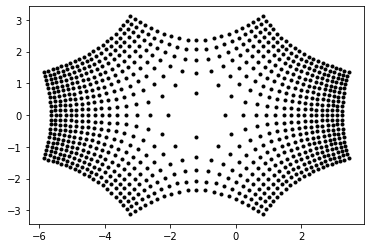

In [38]:
curves = sym.solve(expr.subs(params).subs(c, c1), λ)
Re, Im = np.meshgrid(np.linspace(-10, 10, 21), np.linspace(-10, 10, 21))
# Ks = np.linspace(-20, 20, 201) + 0j
Ks = Re + 1j*Im
for curve in curves:
    temp = sym.lambdify(K, curve)
    lams = temp(Ks)
    plt.plot(lams.real, lams.imag, 'k.')

In [26]:
curve

-2.66666666666667*sqrt(0.178255108018687*K + 1) - 1.20185042515466

In [29]:
temp(np.arange(5))

array([-3.86851709, -4.09644936, -4.30769892, -4.50546765, -4.69204793])

In [33]:
temp(-20)

nan